In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk
import numpy as np
import scipy
from lungmask import mask


In [2]:
os.sys.path.append('../')
import config
from src.transformations import ResampleVolume, ApplyMask, GetMiddleLungSlice, PadVolume, ToTensor, Normalize
resample = ResampleVolume(new_spacing=[1,1,8])
apply_mask = ApplyMask()
get_middle_slice = GetMiddleLungSlice()
pad = PadVolume([512, 512, 64])
to_tensor = ToTensor()
normalize = Normalize()


In [3]:
img_sitk = sitk.ReadImage(os.path.join(config.data_paths["CT3"], "study_1066.nii.gz"))
img_nib = nib.load(os.path.join(config.data_paths["CT3"], "study_1066.nii.gz"))
img = img_nib.get_fdata().transpose(1,0,2)

In [4]:
img = mask.apply(img_sitk, batch_size=1, noHU=False).transpose(1,2,0)

100%|██████████| 3/3 [00:00<00:00, 939.51it/s]


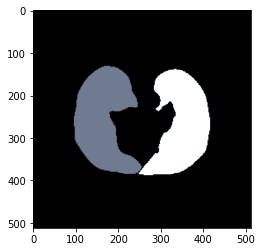

In [5]:
plt.imshow(img_s[:,:,25], cmap=plt.cm.bone)

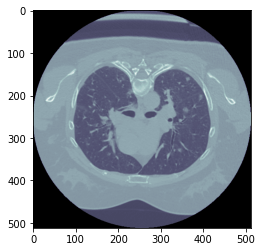

In [6]:
plt.imshow(img[:,:,25], cmap=plt.cm.bone)

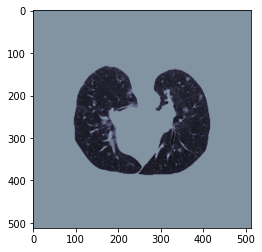

In [7]:
sitk_imgplt.imshow(masked[:,:,25], cmap=plt.cm.bone)

In [8]:
masked, _ = resample(masked, img_nib.header['pixdim'][1:4])

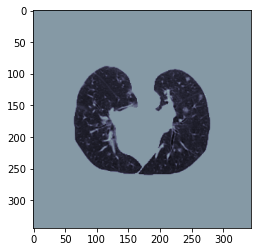

In [9]:
plt.imshow(masked[:,:,25], cmap=plt.cm.bone)

In [10]:
masked = pad(masked)

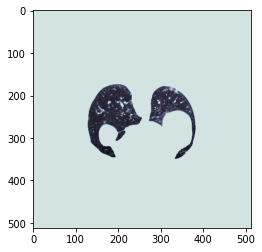

In [11]:
plt.imshow(masked[:,:,25], cmap=plt.cm.bone)

In [12]:
slice_img = get_middle_slice(masked)

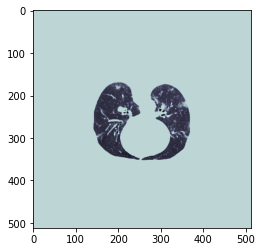

In [13]:
plt.imshow(slice_img, cmap=plt.cm.bone)

In [16]:
slice_img = normalize(slice_img)

In [19]:
tensor = to_tensor(slice_img).shape